In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [6]:
df = pd.read_csv('Toilet_data.csv')

In [7]:
df.head()

,ammonia_ppm,Hydrogen_Sulphide,water_level_cm,month,year,day,hour,minute,event_label_encoded,weekday_encoded
0,32.9,13.6,31.2,9,2024,17,0,0,1,5
1,117.0,1.3,35.2,2,2025,14,0,0,3,0
2,29.0,31.9,21.8,5,2025,14,0,0,1,6
3,30.8,9.5,35.2,4,2025,18,0,0,1,0
4,21.1,99.5,33.9,1,2025,19,0,0,4,3


In [9]:
df = df.drop(columns=['year', 'month', 'day', 'minute'])

In [11]:
df.sample(10)

,ammonia_ppm,Hydrogen_Sulphide,water_level_cm,hour,event_label_encoded,weekday_encoded
2584,2.141712,3.969403,39.038652,2,1,4
1812,9.078662,4.024137,38.239421,13,1,6
2262,2.774787,4.807077,35.642305,21,1,6
344,67.200000,82.100000,14.400000,0,0,3
2957,8.598822,2.461504,36.043931,8,1,4
1742,0.526751,3.440147,35.505111,12,1,6
2392,7.027429,1.538430,38.249544,23,1,6
1138,1.758870,2.838322,35.390567,2,1,6
655,58.000000,33.200000,27.400000,0,1,5
2888,3.983829,1.460096,38.897506,7,1,4


In [16]:
!pip install xgboost

In [17]:
# First, install the missing package
!pip install lightgbm

# Then run your original code
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
import lightgbm as lgb
import xgboost as xgb
import pandas as pd
import matplotlib.pyplot as plt 

X = df.drop(columns=['event_label_encoded'])
y = df['event_label_encoded']

# Define models
models = {
    "LogisticRegression": LogisticRegression(max_iter=1000, class_weight="balanced"),
    "RandomForest": RandomForestClassifier(n_estimators=200, class_weight="balanced", random_state=42),
    "LightGBM": lgb.LGBMClassifier(class_weight="balanced", random_state=42),
    "XGBoost": xgb.XGBClassifier(scale_pos_weight=1, use_label_encoder=False, eval_metric="mlogloss", random_state=42)
}

# Evaluate with cross-validation (F1 Macro = good for balanced multi-class)
results = {}
for name, model in models.items():
    scores = cross_val_score(model, X, y, cv=5, scoring="f1_macro")
    results[name] = scores
    print(f"{name}: mean={scores.mean():.3f}, std={scores.std():.3f}")

C:\Users\shivam\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\shivam\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_ite

LogisticRegression: mean=0.786, std=0.247
RandomForest: mean=0.871, std=0.248
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000437 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 796
[LightGBM] [Info] Number of data points in the train set: 2400, number of used features: 5
[LightGBM] [Info] Start training from score -1.609438
[LightGBM] [Info] Start training from score -1.609438
[LightGBM] [Info] Start training from score -1.609438
[LightGBM] [Info] Start training from score -1.609438
[LightGBM] [Info] Start training from score -1.609438
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[L

C:\Users\shivam\anaconda3\Lib\site-packages\xgboost\training.py:183: UserWarning: [21:07:39] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "scale_pos_weight", "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\shivam\anaconda3\Lib\site-packages\xgboost\training.py:183: UserWarning: [21:07:40] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "scale_pos_weight", "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\shivam\anaconda3\Lib\site-packages\xgboost\training.py:183: UserWarning: [21:07:40] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "scale_pos_weight", "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\shivam\anaconda3\Lib\site-packages\xgboost\training.py:183: UserWarning: [21:07:40] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Par

XGBoost: mean=0.866, std=0.242


C:\Users\shivam\anaconda3\Lib\site-packages\xgboost\training.py:183: UserWarning: [21:07:40] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "scale_pos_weight", "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


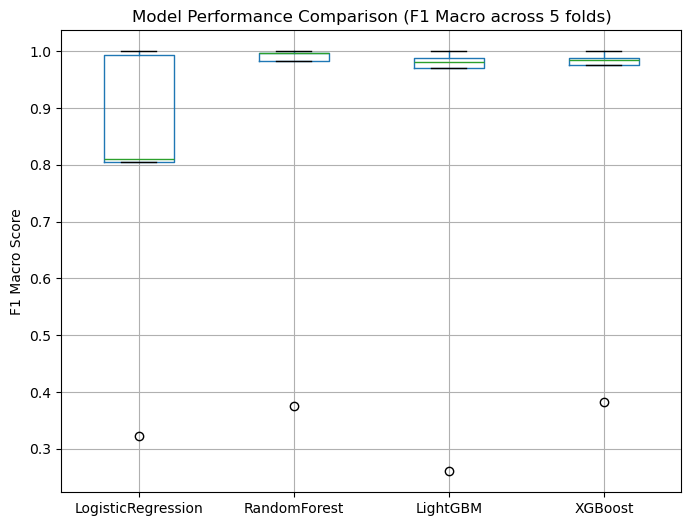

In [18]:
# Convert results to DataFrame
df_results = pd.DataFrame(results)

# Boxplot of F1-scores
df_results.boxplot(figsize=(8,6))
plt.title("Model Performance Comparison (F1 Macro across 5 folds)")
plt.ylabel("F1 Macro Score")
plt.show()


In [24]:
from sklearn.model_selection import train_test_split

X = df.drop(columns=['event_label_encoded'])
y = df['event_label_encoded']

# Stratified split ensures all labels appear in both sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)

print("Train distribution:\n", y_train.value_counts(normalize=True))
print("Test distribution:\n", y_test.value_counts(normalize=True))


Train distribution:
 event_label_encoded
1    0.826250
4    0.059583
2    0.058750
0    0.041250
3    0.014167
Name: proportion, dtype: float64
Test distribution:
 event_label_encoded
1    0.826667
4    0.058333
2    0.058333
0    0.041667
3    0.015000
Name: proportion, dtype: float64


Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        25
           1       1.00      1.00      1.00       496
           2       0.97      1.00      0.99        35
           3       1.00      1.00      1.00         9
           4       1.00      1.00      1.00        35

    accuracy                           1.00       600
   macro avg       0.99      1.00      1.00       600
weighted avg       1.00      1.00      1.00       600



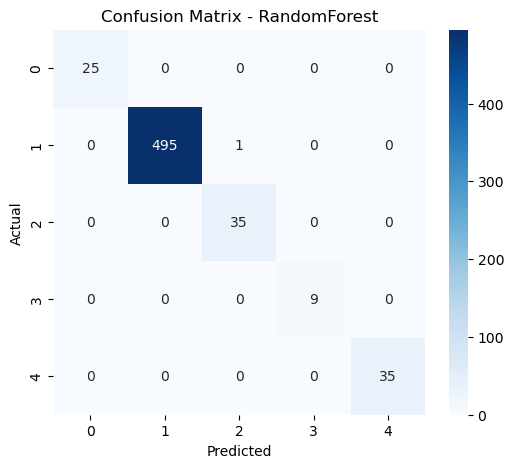

In [25]:
# Train RandomForest
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

rf = RandomForestClassifier(
    n_estimators=300,
    class_weight="balanced",
    random_state=42
)
rf.fit(X_train, y_train)

# Predictions
y_pred = rf.predict(X_test)

# Evaluation
print("Classification Report:\n", classification_report(y_test, y_pred))

cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", 
            xticklabels=rf.classes_, yticklabels=rf.classes_)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - RandomForest")
plt.show()


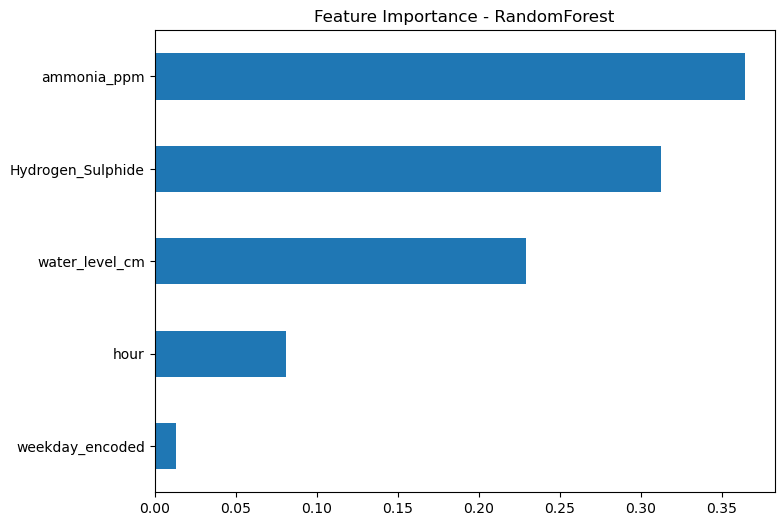

In [26]:
import pandas as pd

feat_importance = pd.Series(rf.feature_importances_, index=X.columns)
feat_importance.sort_values().plot(kind="barh", figsize=(8,6))
plt.title("Feature Importance - RandomForest")
plt.show()


In [27]:
print("Train distribution:\n", y_train.value_counts(normalize=True))
print("Test distribution:\n", y_test.value_counts(normalize=True))


Train distribution:
 event_label_encoded
1    0.826250
4    0.059583
2    0.058750
0    0.041250
3    0.014167
Name: proportion, dtype: float64
Test distribution:
 event_label_encoded
1    0.826667
4    0.058333
2    0.058333
0    0.041667
3    0.015000
Name: proportion, dtype: float64


In [28]:
import joblib
joblib.dump(rf, "randomforest_toilify.pkl")


['randomforest_toilify.pkl']